1 - **reading dataset & load libs**

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the dataset
data = pd.read_csv('data/Profit.csv')


2 - **Defining the input-output features**

In [3]:
# Top 5 rows of the data
data.head()


,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94


In [4]:
# Checking the shape of the data
print('Shape of the dataset (No. of rows, No. of columns):', data.shape)


Shape of the dataset (No. of rows, No. of columns): (200, 2)


3 - **Defining the input-output features and train-test sets**

In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)


Shape of the input features: (200, 1)
Shape of the output features: (200,)


In [7]:
# Defining the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Checking the shape of the training and test sets
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)


Shape of the training input data: (180, 1)
Shape of the training output data: (180,)
Shape of the test input data: (20, 1)
Shape of the test output data: (20,)


4 - **Defining and training and decision tree regression model**

In [8]:
# Defining a decision tree regression model
from sklearn.tree import DecisionTreeRegressor

# Training the decision tree regression model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

5 - **Predict & evaluate**

In [9]:
y_pred = regressor.predict(X_test)

- Comparing actual values & predicted ones: 

In [10]:
preview = pd.DataFrame(data={
    'Predicted Profit': y_pred,
    'Actual Profit': y_test
})

preview

,Predicted Profit,Actual Profit
0,124266.900,124266.90
1,118474.030,118424.03
2,155752.600,155752.60
3,73269.318,35673.41
4,105008.310,104958.31
5,97427.840,97377.84
6,156991.120,156991.12
7,49490.750,49530.75
8,141585.520,141585.52
9,191050.390,191000.39


- Visualizing the performance

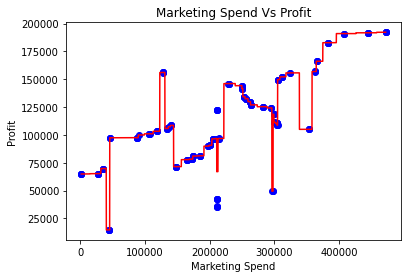

In [11]:
# Visualizing the performance
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')

plt.title('Marketing Spend Vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


- We will obtain the mean squared error as a performance measure.


In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)


Mean Squared Error is: 70673604.91722319


--> It looks too large, let's see another measure which is `RMSE`

In [13]:
import math

RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)


Root Mean Squared Error is: 8406.75947777877


- **N.B**: As the values of MSE and RMSE look large and hence error looks scary, hence, we'll calculate R-squared


In [14]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)


R-Squared is: 0.949097198306818


As we can see the value of R-squared is ~0.95 which is satisfactory and the sign of a well-fitted model.